In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


### Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cust = pd.read_csv("Mall_Customers.csv")
cust.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
# information about dataframe "cust"
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# descriptive statistics for numerical variable
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# check if there is null values
missing = cust.isnull().sum()
missing_value = pd.DataFrame({'Count' : missing})
missing_value

,Count
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
# check if there is any negative values in Spending Score
cust[cust['Spending Score (1-100)'] < 0].count()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# descriptive statistics for non-numeric variable (Gender)
cust['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
# preprocessing : change CustomerID data type to object
cust['CustomerID'] = cust['CustomerID'].astype('object')
cust['CustomerID'].value_counts()

CustomerID
200           1
63            1
73            1
72            1
71            1
             ..
131           1
130           1
129           1
128           1
1             1
Length: 200, dtype: int64

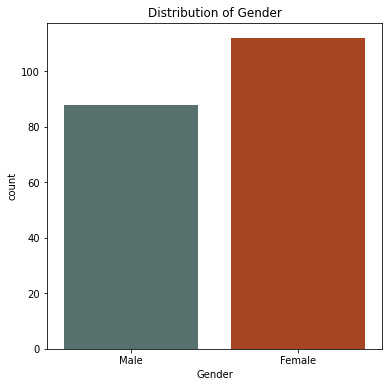

In [ ]:
# data exploration and visualization
# the distribution of gender
plt.figure(1, figsize=(6,6))
sns.countplot(x='Gender', data=cust, palette=['#557571',"#bb3b0e"])
plt.title('Distribution of Gender')
plt.show()

<Figure size 864x288 with 0 Axes>

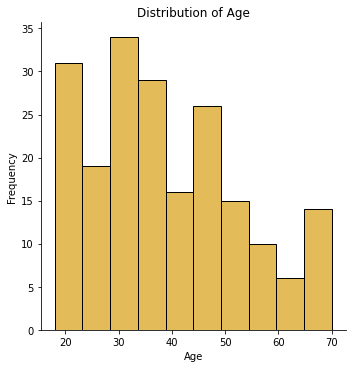

In [ ]:
# distribution of age
plt.figure(1, figsize=(12,4))
sns.displot(cust['Age'], bins=10, color='goldenrod')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

<Figure size 864x288 with 0 Axes>

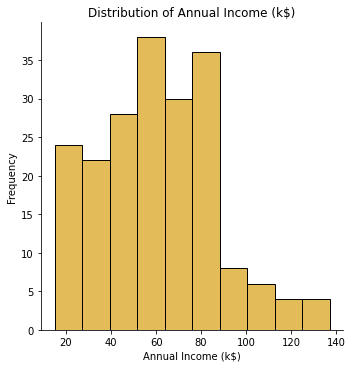

In [ ]:
# distribution of annual income
plt.figure(1, figsize=(12,4))
sns.displot(cust['Annual Income (k$)'], bins=10, color='goldenrod')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income (k$)')
plt.show()

<Figure size 864x288 with 0 Axes>

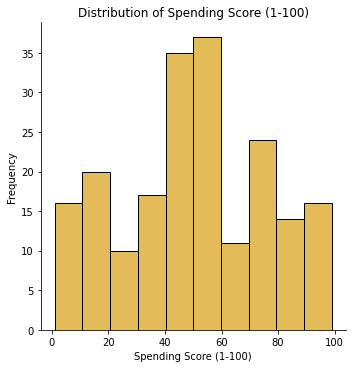

In [ ]:
# distribution of spending score
plt.figure(1, figsize=(12,4))
sns.displot(cust['Spending Score (1-100)'], bins=10, color='goldenrod')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score (1-100)')
plt.show()

In [ ]:
cust['CustomerID'] = cust['CustomerID'].astype('int64')

<Figure size 1152x720 with 0 Axes>

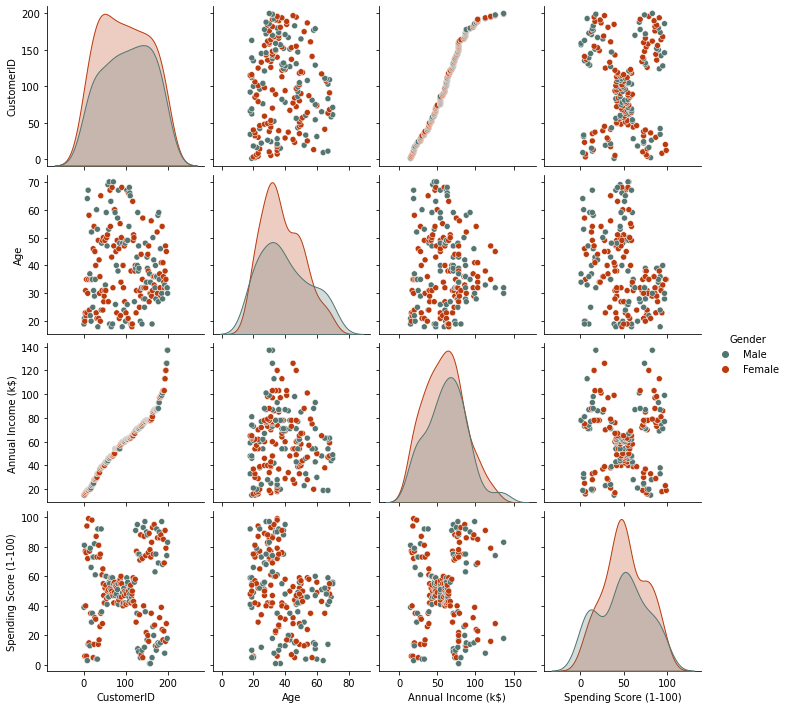

In [ ]:
# Plot pairwise relationships between features in a dataset.
plt.figure(1, figsize=(16,10))
sns.pairplot(data=cust, hue='Gender', palette=['#557571',"#bb3b0e"])
plt.show()

In [ ]:
# splitting the data by Gender
male_customers = cust[cust['Gender'] == 'Male']
female_customers = cust[cust['Gender'] == 'Female']

# average age for men and women
print('The average age of men : ', male_customers['Age'].mean())
print('The average age of women : ', female_customers['Age'].mean())

The average age of men :  39.80681818181818
The average age of women :  38.098214285714285


In [ ]:
# average spending score for men and women
print('The average Spending Score (1-100) of men : ', male_customers['Spending Score (1-100)'].mean())
print('The average Spending Score (1-100) of women : ', female_customers['Spending Score (1-100)'].mean())

The average Spending Score (1-100) of men :  48.51136363636363
The average Spending Score (1-100) of women :  51.526785714285715


In [ ]:
# average spending score for men and women
print('The average Annual Income of men (k$) : ', male_customers['Annual Income (k$)'].mean())
print('The average Annual Income of women (k$) : ', female_customers['Annual Income (k$)'].mean())

The average Annual Income of men (k$) :  62.22727272727273
The average Annual Income of women (k$) :  59.25


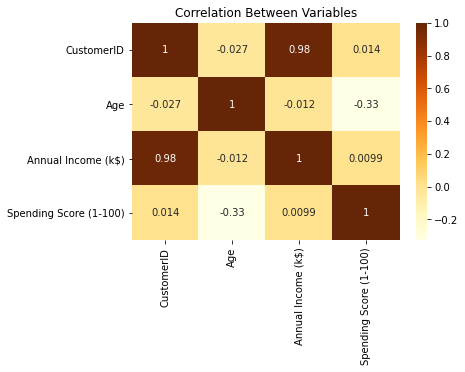

In [ ]:
sns.heatmap(cust.corr(), annot=True, cmap="YlOrBr")
plt.title("Correlation Between Variables")
plt.show()

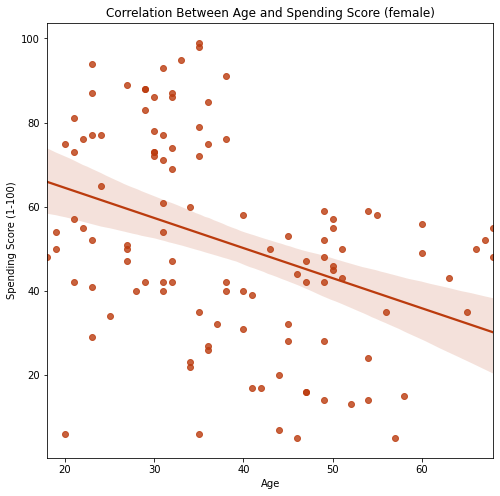

In [ ]:
plt.figure(1, figsize=(8,8))
sns.regplot(x='Age', y='Spending Score (1-100)', data=female_customers, color="#bb3b0e")
plt.title("Correlation Between Age and Spending Score (female)")
plt.show()

### Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# we will use only 3 variable : age, annual income, spending score
X = cust.iloc[:, -3:]

# we will use K-means clustering
kmeans_inertias = []
kmeans_scores = []

# i.e we use k from 2-7
for k in range(2, 8):
  kmeans = KMeans(n_clusters=k).fit(X)
  kmeans_inertias.append(kmeans.inertia_)
  kmeans_scores.append(silhouette_score(X, kmeans.labels_))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


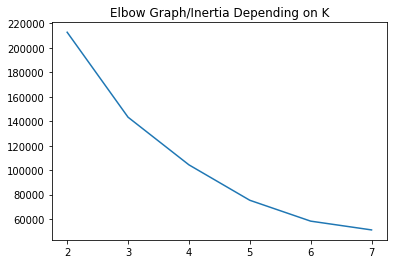

In [ ]:
# inertia depends on k
sns.lineplot(range(2, 8), kmeans_inertias)
plt.title('Elbow Graph/Inertia Depending on K')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


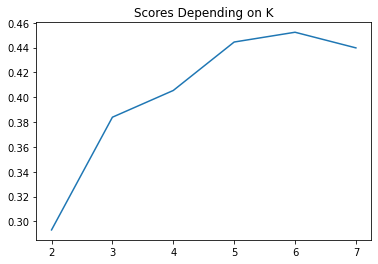

In [ ]:
sns.lineplot(range(2, 8), kmeans_scores)
plt.title('Scores Depending on K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


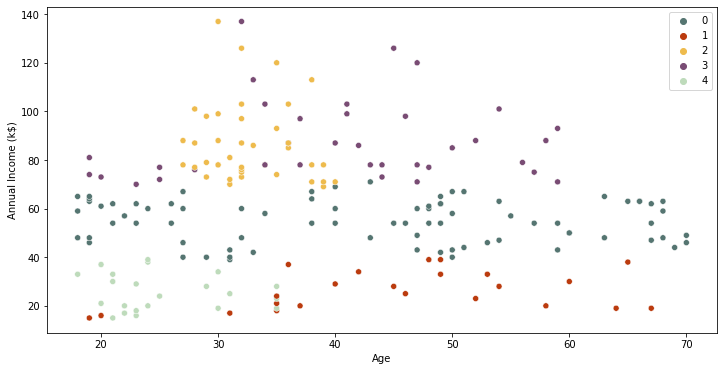

In [ ]:
# K-means visualization on pair of 2 features : Age, Annual Income
plt.figure(figsize=(12, 6))
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=kmeans.labels_, palette=['#557571',"#bb3b0e", "#eebb4d", "#794c74", "#bedbbb"])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


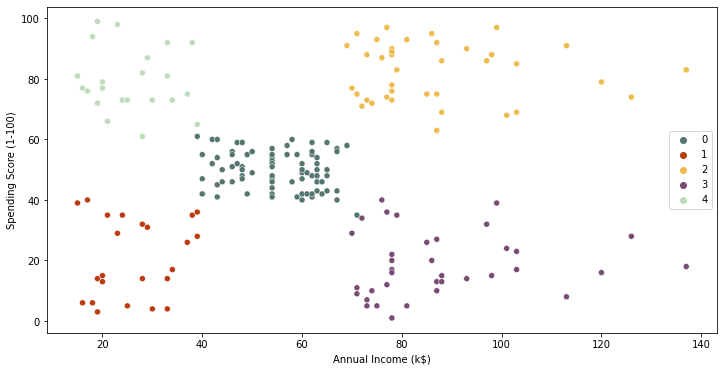

In [ ]:
# K-means visualization on pair of 2 features : Annual Income, Spending score
plt.figure(figsize=(12, 6))
sns.scatterplot(X.iloc[:, 1], X.iloc[:, 2], hue=kmeans.labels_, palette=['#557571',"#bb3b0e", "#eebb4d", "#794c74", "#bedbbb"])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


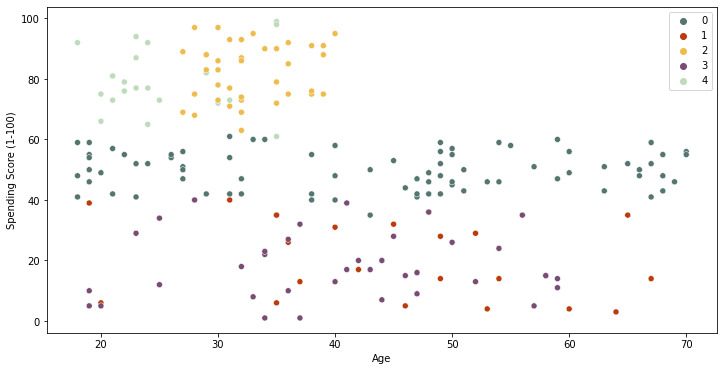

In [ ]:
# K-means visualization on pair of 2 features : Age, Spending score
plt.figure(figsize=(12, 6))
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 2], hue=kmeans.labels_, palette=['#557571',"#bb3b0e", "#eebb4d", "#794c74", "#bedbbb"])
plt.show()

In [ ]:
# Profiles of customers
X['Label'] = kmeans.labels_

In [ ]:
X['Label'].value_counts()

0    79
2    39
3    37
1    23
4    22
Name: Label, dtype: int64

In [ ]:
for k in range(5):
    print(f'Cluster Number : {k}')
    print(X[X['Label'] == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

Cluster Number : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  79.000000           79.000000               79.000000
mean   43.126582           54.822785               49.835443
min    18.000000           39.000000               35.000000
max    70.000000           71.000000               61.000000



Cluster Number : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  23.000000           23.000000               23.000000
mean   45.217391           26.304348               20.913043
min    19.000000           15.000000                3.000000
max    67.000000           39.000000               40.000000



Cluster Number : 2
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
min    27.000000           69.000000               63.000000
max    40.000000          137.000000               97.000000



Cluster Number : 3


### Conclusion
From 5 clusters of customers, here are the interpretation of segmentation that we can get :
- Cluster 1 : Customers with middle annual income and medium spending score in mall
- Cluster 2 : Customers with low annual income and low spending score in mall
- Cluster 3 : Customers with high annual income and high spending score in mall
- Cluster 4 : Customers with high annual income but low spending score in mall
- Cluster 5 : Customers with low annual income but high spending score in mall

In [ ]:
https://towardsdatascience.com/customer-segmentation-analysis-with-python-6afa16a38d9e